# Анализ игры в преферанс игрока Байкер (https://www.gambler.ru/forum/index.php?showtopic=510250&st=60)

In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from numpy import polyfit
degree = 2
# import data
data=pd.read_excel('Pref_rating.xlsx')
data
# Загружаем данные

,percent,rating,whists
0,4,333,-14
1,6,393,0
2,8,400,-5
3,10,347,-1
4,12,348,11
5,14,382,8
6,16,401,4
7,18,355,1
8,20,370,18
9,22,353,16


In [16]:
# корреляция между признаками
corr=data.corr()
corr.style.background_gradient(cmap='coolwarm')

,percent,rating,whists
percent,1.000000,-0.094919,0.709501
rating,-0.094919,1.000000,0.104800
whists,0.709501,0.104800,1.000000


# Построение графиков

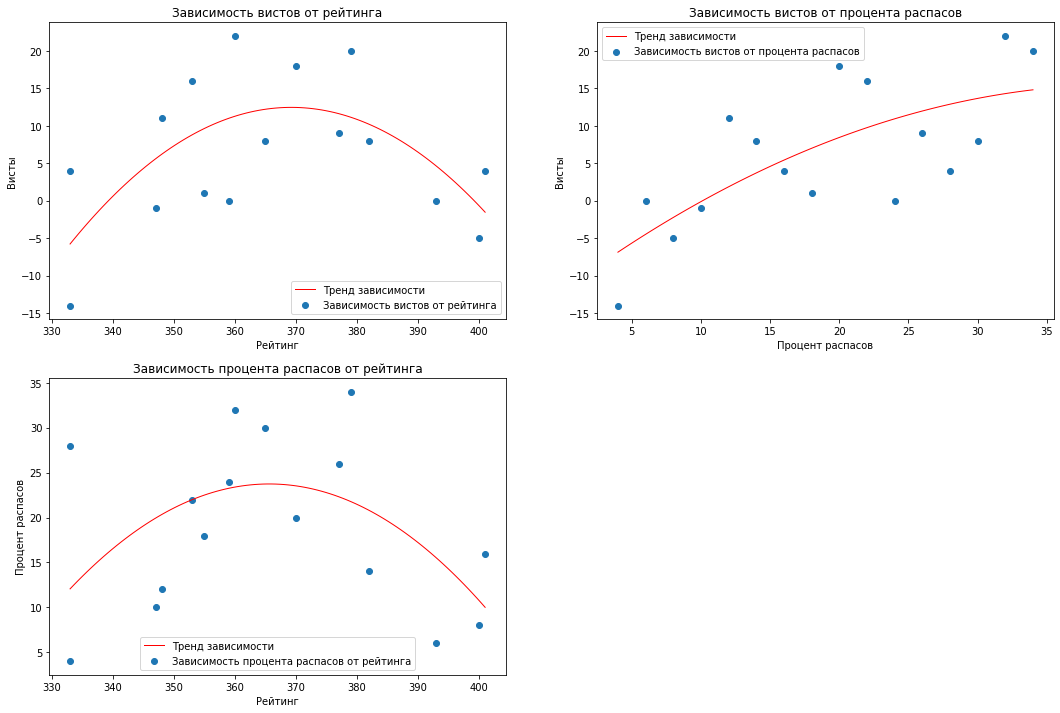

In [17]:

# plotting
fig =  plt.figure(figsize=(18,12))

#------------------
# plot rating vs result
x = data['rating'].values
y = data['whists'].values
coef = polyfit(x, y, degree)
px = np.linspace(min(x), max(x), 100)
# create curve
curve = list()
for i in range(len(px)):
	value = coef[-1]
	for d in range(degree):
		value += px[i]**(degree-d) * coef[d]
	curve.append(value)
# plot curve over original data
ax1 = fig.add_subplot(221)
ax1.scatter(x,  y, label = 'Зависимость вистов от рейтинга')
ax1.set_title('Зависимость вистов от рейтинга')
ax1.plot(px,curve, color='red', linewidth=1, label = 'Tренд зависимости')
plt.xlabel('Рейтинг')
plt.ylabel('Висты')
plt.legend()
#------------------
# plot procent vs result
x = data['percent'].values
y = data['whists'].values
coef = polyfit(x, y, degree)
px = np.linspace(min(x), max(x), 100)
# create curve
curve = list()
for i in range(len(px)):
	value = coef[-1]
	for d in range(degree):
		value += px[i]**(degree-d) * coef[d]
	curve.append(value)
# plot curve over original data
ax2 = fig.add_subplot(222)
ax2.scatter(x,  y, label = 'Зависимость вистов от процента распасов')
ax2.set_title('Зависимость вистов от процента распасов')
ax2.plot(px,curve, color='red', linewidth=1, label = 'Tренд зависимости')
plt.xlabel('Процент распасов')
plt.ylabel('Висты')
plt.legend()

#------------------
# plot procent vs rating
x = data['rating'].values
y = data['percent'].values
coef = polyfit(x, y, degree)
px = np.linspace(min(x), max(x), 100)
# create curve
curve = list()
for i in range(len(px)):
	value = coef[-1]
	for d in range(degree):
		value += px[i]**(degree-d) * coef[d]
	curve.append(value)
# plot curve over original data
ax3 = fig.add_subplot(223)
ax3.scatter(x,  y, label = 'Зависимость процента распасов от рейтинга')
ax3.set_title('Зависимость процента распасов от рейтинга')
ax3.plot(px,curve, color='red', linewidth=1, label = 'Tренд зависимости')
plt.xlabel('Рейтинг')
plt.ylabel('Процент распасов')
plt.legend()
plt.show()


Выводы:

Итак, анализ

1. Имеем всего порядка 16 наблюдений, что явно мало для полноценных выводов, но попробую с тем что есть
2. Зависимость вистов от рейтинга нелинейна, сначала растет, потом падает. Возможное объяснение:
        - с ростом рейтинга, люди играют осторожней и одна из задач предохранится от случайностей и не рисковать
3. Зависимость процента распасов от рейтинга тоже нелинейна, сначала растет, потом падает. Возможное объяснение:
        - использование фактора той самой случайности: люди с опытом начинают понимать, что фактор случайности 
            зачастую в префе играет решающую роль, когда все остальные шансы равны (опыт и тп). Поэтому, сценарий 
            игры зачастую следующий: люди в начале игры играют распасы пока кто нибудь не улетит в минуса, а потом 
            быстро доигрывают партию избегая дальнейших распасов (случайностей)
4. Зависимость вистов от процента распасов явно линейна и корреляция Пирсона порядка 0.71 и очень сильна (>0.5). 
Возможное объяснение:
        - данные взяты у достаточно сильного игорка с рейтингом больше 300, следовательно, он умеет играть распасы
        и есть тенденция набирать висты (использовать случайность в свою пользу), умение во время выходить из распасов
        и контролировать игру.
        С другой стороны,  видно, что сам процент распасов в игре сильно зависит от рейтинга партнеров, поэтому тренд
        скорее всего с ростом рейтинга партнеров будет уменьшаться и достигнет, кого-то плато.
    

Далее, можно ли назвать этот тренд "методом"?
Сразу возникает вопрос "методом" чего? И вообще, как может быть тренд методом? Если он зависит не только от игрока, а и от опыта партнеров?
Скорее всего нет, это не метод, а тенденция, признак осторожности игрока.
Чтобы понять более емко, нужно:
    - сравнить подобную статистику у других игроков с разными рейтингами
    - выборки данных нужны значительно больше, не меньше 100
    - нужно провести исследование, как подобный "метод" влияет на игру, а именно - обрать две выборки игр не меньше 100
      каждая, где в одной Байкер будет использовать метод, а в другой нет (если у него конечно это получится) 
      и сравнить результаты, в том числе проведя статистические тесты

# Прогнозирование

Теперь попробую по собранным данным сделать прогноз зависимости полученных вистов в игре от среднего рейтинга соперников
и процента распасов в игре.

Пробую обучить на данных три модели: RandomForest, MARS и XGBRegressor  и по результатам абсолютной средней ошибки на необученных данных выбираю модель

In [18]:
# evaluate multivariate adaptive regression splines for regression
# Example of Splitting a Contrived Dataset into Train and Test
from random import seed
from random import randrange
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from pyearth import Earth
np.warnings.filterwarnings('ignore')
# define dataset
data=pd.read_excel('Pref_rating.xlsx')
# define the models
models=[Earth(),XGBRegressor(),RandomForestRegressor()]

разобю выборку на тренировочный и тестовый набор, для этого возьму два значения и уберу их из общего датасета, используя для проверки точности в дальнейшем

In [19]:
# Split a dataset into a train and test set
def train_test_split(dataset, split=0.85):
    train = list()
    train_size = split * len(dataset)
    dataset_copy = list(dataset)
    while len(train) < train_size:
        index = randrange(len(dataset_copy))
        train.append(dataset_copy.pop(index))
    return train, dataset_copy
# test train/test split
seed(1)
dataset = data.values.tolist()
train, test = train_test_split(dataset)

In [20]:
x_train, y_train = np.array(train)[:,:-1],np.array(train)[:,-1]
x_test, y_test=np.array(test)[:,:-1],np.array(test)[:,-1]

In [21]:
x_test

array([[ 14, 382],
       [ 22, 353]])

In [22]:
# обучаю и тестирую модели
for model in models:
    # define the evaluation procedure
    model=model.fit(x_train,y_train)
    yhat=model.predict(x_test)

    # report performance
    print('Модель: %.7s, MAE: %.3f' % (str(model),mean_absolute_error(y_test, yhat)))

Модель: Earth(), MAE: 7.331
Модель: XGBRegr, MAE: 9.348
Модель: RandomF, MAE: 5.225


Модель RandomForest показывает самый лучший результат.

Обучаю ее на всех данных

In [23]:
model=RandomForestRegressor()
X,y=data.values[:,:-1],data.values[:,-1]
rf=model.fit(X,y)
yhat=rf.predict(X)

# report performance
print('Модель: %.7s, MAE: %.3f' % (str(model),mean_absolute_error(y, yhat)))

Модель: RandomF, MAE: 2.681


Пробую предсказать количество вистов в игре по двум данным:
    1. Процент вистов - 29, средний рейтинг - 340
    2. Процент вистов - 12, средний рейтинг - 390

In [24]:
raw1=np.array([29,340]).reshape(1,-1)
raw2=np.array([12,390]).reshape(1,-1)
yhat1=rf.predict(raw1)
yhat2=rf.predict(raw2)

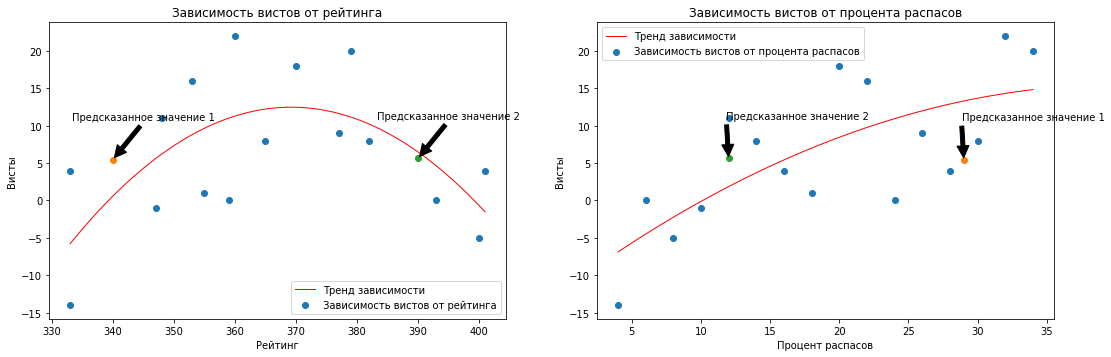

In [25]:
# import data
data=pd.read_excel('Pref_rating.xlsx')

# plotting
fig =  plt.figure(figsize=(18,12))
#------------------
# plot rating vs result
x = data['rating'].values
y = data['whists'].values
coef = polyfit(x, y, degree)
px = np.linspace(min(x), max(x), 100)
# create curve
curve = list()
for i in range(len(px)):
	value = coef[-1]
	for d in range(degree):
		value += px[i]**(degree-d) * coef[d]
	curve.append(value)
# plot curve over original data
ax1 = fig.add_subplot(221)
ax1.scatter(x,  y, label = 'Зависимость вистов от рейтинга')
ax1.scatter(raw1[0][1],  yhat1[0])
ax1.scatter(raw2[0][1],  yhat2[0])

plt.annotate('Предсказанное значение 1',
ha = 'center', va = 'bottom',
xytext = (raw1[0][1]+5,  yhat1[0]+5),
xy = (raw1[0][1],  yhat1[0]),
arrowprops = { 'facecolor' : 'black', 'shrink' : 0.05 })

plt.annotate('Предсказанное значение 2',
ha = 'center', va = 'bottom',
xytext = (raw2[0][1]+5,  yhat2[0]+5),
xy = (raw2[0][1],  yhat2[0]),
arrowprops = { 'facecolor' : 'black', 'shrink' : 0.05 })

ax1.set_title('Зависимость вистов от рейтинга')
ax1.plot(px,curve, color='red', linewidth=1, label = 'Tренд зависимости')
plt.xlabel('Рейтинг')
plt.ylabel('Висты')
plt.legend()


#------------------
# plot procent vs result
x = data['percent'].values
y = data['whists'].values
coef = polyfit(x, y, degree)
px = np.linspace(min(x), max(x), 100)
# create curve
curve = list()
for i in range(len(px)):
	value = coef[-1]
	for d in range(degree):
		value += px[i]**(degree-d) * coef[d]
	curve.append(value)
# plot curve over original data
ax2 = fig.add_subplot(222)
ax2.scatter(x,  y, label = 'Зависимость вистов от процента распасов')

ax2.scatter(raw1[0][0],  yhat1[0])
ax2.scatter(raw2[0][0],  yhat2[0])

plt.annotate('Предсказанное значение 1',
ha = 'center', va = 'bottom',
xytext = (raw1[0][0]+5,  yhat1[0]+5),
xy = (raw1[0][0],  yhat1[0]),
arrowprops = { 'facecolor' : 'black', 'shrink' : 0.05 })

plt.annotate('Предсказанное значение 2',
ha = 'center', va = 'bottom',
xytext = (raw2[0][0]+5,  yhat2[0]+5),
xy = (raw2[0][0],  yhat2[0]),
arrowprops = { 'facecolor' : 'black', 'shrink' : 0.05 })


ax2.set_title('Зависимость вистов от процента распасов')
ax2.plot(px,curve, color='red', linewidth=1, label = 'Tренд зависимости')
plt.xlabel('Процент распасов')
plt.ylabel('Висты')
plt.legend()

plt.show()

Выводы по моделе предсказания:
    - видно, что модель более-менее точно предсказывает результаты на диапазонах заданных данных
    - однако, нет уверенности, что она будет так же хорошо это делать на данных не вошедших в ее обучение,
    - чтобы добиться этого и повысить точность, необходимо:
        - увеличить размер датасета хотябы до ста значений
        - увеличить количество факторов-признаков влияющих на результат, сейчас их 2 (процент пасов, средний рейтинг),
        а можно еще добавить, например:
            - игра в рабочее, не рабочее время
            - отвлекала ли жена или нет
            - день недели
            - праздничный, предпраздничный или послепраздничный день
            - трезвый-пьяный
            - и т.д